In [1]:
from __future__ import print_function
from __future__ import division
import pickle

In [2]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

In [3]:
%%file sm_params_custom.py
"""
SSP Paramaters
make.py

"""
ssp_input = 'ssp/bc03/chab/lr/'    # Input SSP folder
#ssp_input = 'ssp/cb07/'
ssp_output = 'smpy_ssp_output.npz' # Output filename

# Star formation timescales (Gyr)
#tau = [-5.0, -1.0, -0.2,
       #0.1,  0.2,  0.5,  1.0,  2.0,  5.0,  10.0]
    
tau = [-5,-1,-0.2,-0.1,0.01,0.05,
       0.1,0.2,0.3,0.4,0.5,0.75,1,2,4,6,8,10]

# Model ages (Gyr)
#tg = [0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0]
tg = [0.1,0.2,0.3,0.4,0.5,0.75,1,2,4,6,8,10,12]

# Dust Total Attenuation Values
tauv = [0.0, 0.2, 0.4, 1.0, 2.0]

dust_model = 'calzetti'               # 'charlot' - Charlot & Fall or 'calzetti' - Caltzetti 2000
mu = 0.3                              # Fraction of tauv from ISM
epsilon = 0.                          # Gas recycling parameter
metallicities = [3,5,0]               # Metallicities to use
                                      # Z = [0.05, 0.0001, 0.0004, 0.004, 0.008, 0.02]
                                      # Z_solar = 0.02

csf = False                           # Set to constant SFR (overrides, tau values)

#Nebular emission
add_nebular = True                    # Include nebular emission
neb_file = 'smpy-fit/nebular_emission.dat'     # Nebular emission path
fesc = 0.2                            # Lyman continuum escape fraction

"""
Synthetic Magnitudes Parameters
process.py

"""

synmag_output = 'smpy_synmag_output'

# Filter Directory and Naming Convention - Assumes Ordered Numerically
filt_dir = 'smpy-fit/SDSS_filters/'
filt_names = '*.txt'

# r-band
tot = 2 # ID/No. of filter used for total magnitude measurement
mlr = 2 # ID/No. of filter used for mass-to-light ratio computation

# Redshift Grid
zspacing = 'linear' # or 'log'
zmin = 0.
zmax = 0.1
zstep = 0.01

madau = True                           # Include HI absorption (Madau 1995)

"""
Template matching parameters
match.py

"""
#Observed magnitudes and redshifts to fit
input_catalog = '../../../fits/NSA/nsa_v0_1_2.fits '

ID_col = 'ID'
z_col = 'z'

flux_col_end = 'flux'                 # Naming convention for input catalog
fluxerr_col_end ='fluxerr'            # E.g. ACS_F606W_*flux_col_end* = F606W Flux
mag_col_end = 'mag'                   # ACS_F606W_*fluxerr_col_end* = F606W Flux Error
magerr_col_end ='magerr'

filts_used = [1,3,5]                  # Filter columns from input used (if not all)

flux_corr = 1.0                       # Flux correction to convert to Total Mags

fit_mode = 'flux'                     # Fit to Mag Colours - 'colours' or 'flux'
#fit_mode = 'colours'

calc_mode = False                     # Calculate Mode Mass
mode_mass_percentage = 10.            # Top percentage of fits to use in mode
                                      # mass calculations

muv_max, muv_min, muv_bins = -23., -16., 100 # PDF bins
mass_max, mass_min, mass_bins = 12., 6., 100
beta_max, beta_min, beta_bins = 3., -3., 50

#Output table parameters:
output_name = 'smpy_match_output'
table_format = 'fits'                 # Available formats:'fits'/'ascii'/'IPAC'
                                      # (those available to local installation
                                      #  of AtPY)

Overwriting sm_params_custom.py


In [4]:
# this takes a few minutes
%run smpy-fit/makeSEDs.py -p sm_params_custom.py

Loaded sm_params_custom.py as params
SSP binary files found:
ssp/bc03/chab/lr/bc2003_lr_m22_chab_ssp.ised
ssp/bc03/chab/lr/bc2003_lr_m32_chab_ssp.ised
ssp/bc03/chab/lr/bc2003_lr_m42_chab_ssp.ised
ssp/bc03/chab/lr/bc2003_lr_m52_chab_ssp.ised
ssp/bc03/chab/lr/bc2003_lr_m62_chab_ssp.ised
ssp/bc03/chab/lr/bc2003_lr_m72_chab_ssp.ised

Metallicity 1:
Padova (1994) + S. Charlot (1997). X=0.756, Y=0.24, Z=0.004
Include nebular emission: False
Metallicity 2:
Padova (1994) + S. Charlot (1997). X=0.70, Y=0.28, Z=0.02
Include nebular emission: False
Metallicity 3:
Padova (1994) + S. Charlot (1997). X=0.5980, Y=0.352, Z=0.0500
Include nebular emission: False
Saving to numpy binaries: Done


In [5]:
%run smpy-fit/processSEDs.py -p sm_params_custom.py

Loaded sm_params_custom.py as params
Redshifts range from 0.0 to 0.1 in 10 steps 

Loading input SEDs from - smpy_ssp_output.npz:
Wavelength Array              
Age Array                     
SEDs                          
Stellar Masses                
Star Formation Rates          
Done 

Setting up redshift dependent arrays:
Ages                          
Distance Moduli               
Madau Absorption Decrements   
Filter                         Filter length   Prep Time      
------------------------------------------------------------


00fuv.txt                      471             0.07           


01nuv.txt                      1321            0.08           


1u1.txt                        23              0.06           


2g1.txt                        33              0.06           


3r1.txt                        34              0.06           


4i1.txt                        36              0.05           


5z1.txt                        29              0.05          

In [6]:
# read smpy outputs
synmag = np.load('smpy_synmag_output.main.npz')
par = synmag['parameters'].item()

mags_all = np.load('smpy_synmag_output.mags.npy')

# for convenience...
axes = ['filter', 'redshift', 'tg', 'Av', 'tau', 'metallicity']
axes = dict(zip(axes, range(len(axes))))
for n, i in axes.items():
    print('number of {}: {}'.format(n, mags_all.shape[i]))
    
print(mags_all.shape)

number of tau: 18
number of redshift: 10
number of filter: 7
number of metallicity: 3
number of Av: 5
number of tg: 13
(7, 10, 13, 5, 18, 3)


In [7]:
# for convenience...
values = {}
values['filter'] = np.array(['F','N','u', 'g', 'r', 'i', 'z'])
values['redshift'] = synmag['z']
values['tg'] = par['tg'] / 1e9  # Gyr
values['Av'] = par['Av']
values['tau'] = par['SFH'] / 1e9  #Gyr
values['metallicity'] = np.array([float(s.split('=')[-1]) for s in par['SSPs']])
values

{'Av': array([ 0. ,  0.2,  0.4,  1. ,  2. ]),
 'filter': array(['F', 'N', 'u', 'g', 'r', 'i', 'z'], 
       dtype='|S1'),
 'metallicity': array([ 0.004,  0.02 ,  0.05 ]),
 'redshift': array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09]),
 'tau': array([ -5.  ,  -1.  ,  -0.2 ,  -0.1 ,   0.01,   0.05,   0.1 ,   0.2 ,
          0.3 ,   0.4 ,   0.5 ,   0.75,   1.  ,   2.  ,   4.  ,   6.  ,
          8.  ,  10.  ]),
 'tg': array([  0.101518  ,   0.20255699,   0.28611901,   0.40415398,
          0.50880099,   0.71870099,   1.01519002,   2.        ,
          4.        ,   6.        ,   8.        ,  10.        ,  12.        ])}

In [8]:
pickle.dump(values,open( "values.p", "wb"))

In [9]:
def take_nearest(axisname, val, array, values=values):
    idx = (np.abs(values[axisname] - val)).argmin()
    print('Found {} = {}'.format(axisname, values[axisname][idx]))
    return array.take([idx], axis=axes[axisname])

In [10]:
# Example of extracting magnitudes as a function of age

#get magnitude
mags = mags_all
# restframe (redshift = 0)
mags = take_nearest('redshift', 0.0, mags)
# solar metallicity
mags = take_nearest('metallicity', 0.02, mags)
# no dust extinction
mags = take_nearest('Av', 0.0, mags)
# some SF timescale
mags = take_nearest('tau', 2.5, mags)

F, N, u, g, r, i, z = mags.squeeze()

Found redshift = 0.0
Found metallicity = 0.02
Found Av = 0.0
Found tau = 2.0


In [11]:
# for convenience...
def age_line(x, y, val, color, label=r'$\tau$', lw=3):
    plt.plot(x, y, '-', color=color, lw=lw,
             label=r'{} = {}'.format(label, val),
             zorder=1)
    plt.scatter(x, y, c=values['tg'], s=50, zorder=2)
    
    print(values['tg'].shape,x.shape,y.shape)

(13,) (13,) (13,)


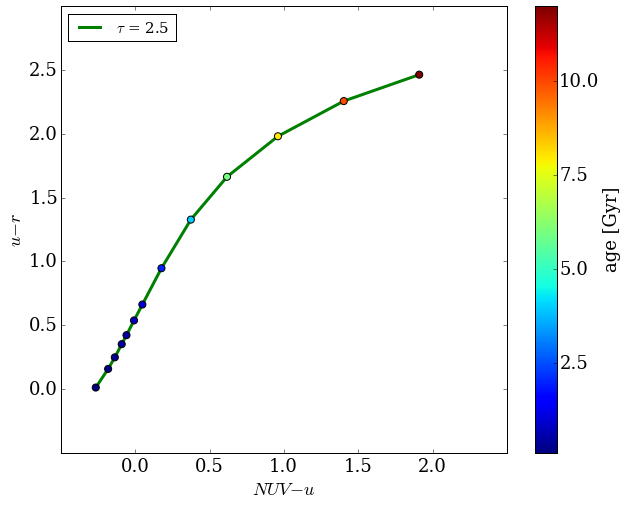

In [14]:
# plot the track of an aging galaxy in restframe colour-colour space
age_line(N-u, u-r, 2.5, 'g')
cb = plt.colorbar()
cb.ax.set_ylabel('age [Gyr]')
plt.legend(loc = 'upper left', fontsize='small')
plt.xlabel('$NUV-u$')
_ = plt.ylabel('$u-r$')

In [15]:
# for convenience...
def color_color_age_line_par(par, val, mags, linecolor='k',
                             label=r'$\tau$',
                             values=values,
                             colxb='u', colxr='r',
                             colyb='r', colyr='z'):
    mags = take_nearest(par, val, mags)
    f = values['filter']
    colx = mags[f == colxb] - mags[f == colxr]
    coly = mags[f == colyb] - mags[f == colyr]
    colx = colx.squeeze()
    coly = coly.squeeze()
    age_line(colx, coly, val, linecolor, label)

Found redshift = 0.0
Found metallicity = 0.02
Found tau = 2.0
Found Av = 0.0
(13,) (13,) (13,)
Found Av = 0.4
(13,) (13,) (13,)
Found Av = 1.0
(13,) (13,) (13,)


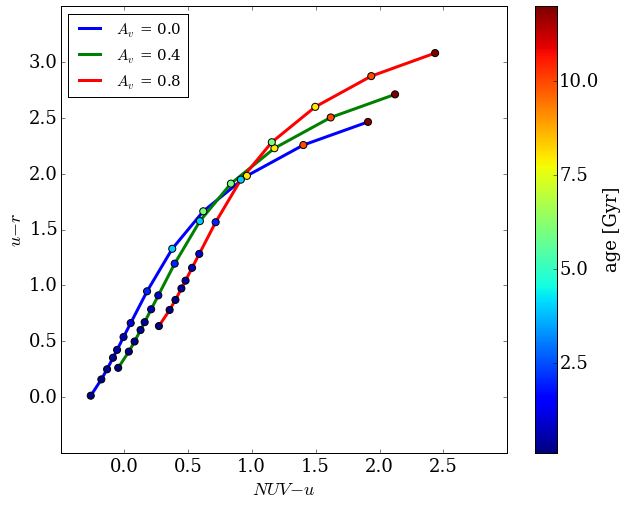

In [19]:
# plot tracks for different extinctions

#get magnitude
mags = mags_all
# restframe (redshift = 0)
mags = take_nearest('redshift', 0.0, mags)
# solar metallicity
mags = take_nearest('metallicity', 0.02, mags)
# medium SF timescale
mags = take_nearest('tau', 2.5, mags)

label = r'$A_v$'
color_color_age_line_par('Av', 0.0, mags, 'b', label,colxb='N',colxr='u',colyb='u', colyr='r')
color_color_age_line_par('Av', 0.4, mags, 'g', label,colxb='N',colxr='u',colyb='u', colyr='r')
color_color_age_line_par('Av', 0.8, mags, 'r', label,colxb='N',colxr='u',colyb='u', colyr='r')
cb = plt.colorbar()
cb.ax.set_ylabel('age [Gyr]')
plt.legend(loc = 'upper left', fontsize='small')
plt.xlabel('$NUV-u$')
_ = plt.ylabel('$u-r$')

In [26]:
# create an arrow corresponding to 1 mag of extinction

#get magnitude
mags = mags_all
# restframe (redshift = 0)
mags = take_nearest('redshift', 0.0, mags)
# solar metallicity
mags = take_nearest('metallicity', 0.02, mags)
# medium SF timescale
mags = take_nearest('tau', 2.5, mags)

mags_Av0 = take_nearest('Av', 0.0, mags)
mags_Av1 = take_nearest('Av', 0.4, mags)
dmag = mags_Av1 - mags_Av0
dmag = dmag.squeeze()
# get rid of nans
dmag = dmag[:, ~np.isnan(dmag[0])]
F, N, u, g, r, i, z = dmag.mean(axis=1)
grAv1mag = N-u
riAv1mag = u-r

Found redshift = 0.0
Found metallicity = 0.02
Found tau = 2.0
Found Av = 0.0
Found Av = 0.4


Found redshift = 0.0
Found metallicity = 0.02
Found Av = 0.0
Found tau = 0.5
(13,) (13,) (13,)
Found tau = 2.0
(13,) (13,) (13,)
Found tau = 10.0
(13,) (13,) (13,)


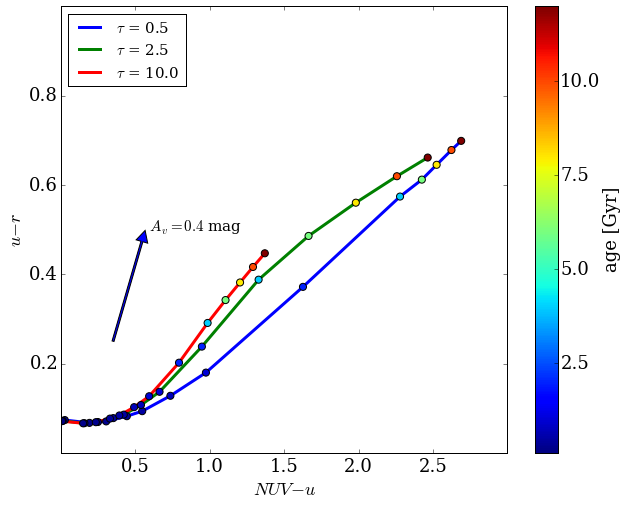

In [28]:
# plot tracks for different tau, with extinction arrow

#get magnitude
mags = mags_all
# restframe (redshift = 0)
mags = take_nearest('redshift', 0.0, mags)
# solar metallicity
mags = take_nearest('metallicity', 0.02, mags)
# no dust extinction
mags = take_nearest('Av', 0.0, mags)

label = r'$\tau$'
color_color_age_line_par('tau', 0.5, mags, 'b', label)
color_color_age_line_par('tau', 2.5, mags, 'g', label)
color_color_age_line_par('tau', 10.0, mags, 'r', label)

cb = plt.colorbar()
cb.ax.set_ylabel('age [Gyr]')
plt.legend(loc = 'upper left', fontsize='small')
plt.xlabel('$NUV-u$')
plt.ylabel('$u-r$')

xy0 = (0.35, 0.25)
xy1 = (0.35 + grAv1mag, 0.25 + riAv1mag)
arrow = plt.annotate("", xy=xy1, xytext=xy0,
             arrowprops=dict(frac=0.1, width=2))
plt.text(xy1[0], xy1[1], ' $A_v = 0.4$ mag', ha='left',# va='bottom',
         fontsize='small')

_ = plt.axis((0,3, 0.0,1))